## Project tasks

1. Build classifiers using Linear Regression, Random Forest and Neural Networks
2. Perform cross validation to measure each methods classification accuracy
3. Discuss the result of each method
    + Linear Regression: What are the coefficients of the Linear Regression
    + Random Forest: What 5 features are the most informative and what are their information strength (i.e., information gain)?
    + Neural Network: How does the classification accuracy change with different number of hidden layers?
4. Perform K-means clustering
    + Measure the rand index, and silhouette scores
    + How does the score change with K={2,3,…, 10}?
    + Discuss the result of the clustering by comparing it with the classification results

### The report shall include the following contents and shall be less than 5 pages:
+ Introduction (One paragraph)
+ Method
    + Linear Regression
    + Random Forest
    + Neural Network
+ Results
+ Discussion
    + Linear Regression: What are the coefficients of the Linear Regression
    + Random Forest: What 5 features are the most informative and what are their information strength (i.e., information gain)?
    + Neural Network: How does the classification accuracy change with different number of hidden layers?
+ Conclusion

---

## 1. Introduction

### 1.1 Feature Selection

주어진 data에는 feature가 여러 개 있었다. 그러나 PCA (Principal Component Analysis)와 데이터 간의 collinearity를 분석한 결과, fractal_dimension_mean, smoothness_mean and symmetry_mean는 종양의 class를 판별할 때 유용하지 않은 것으로 판단되었다. 따라서 위 3가지 feature를 제외하고 모델링을 하였다.

## 2. Method

### 2.1 Linear Regression

### 2.2 Random Forest

### 2.3 Neural Network

---

## Code

reference: https://www.kaggle.com/jcrowe/model-comparison-for-breast-cancer-diagnosis/notebook

In [28]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint as sp_randint

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("data/data.csv", header=0)    # here header 0 means the 0 th row is our coloumn 
                                                # header in data

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# Remove unnecessary columns
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [8]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [9]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 1. Feature Selection

### 1.1 Principal Component Analysis

The purpose for doing principal component analysis on the labeled data here is to observe the variance explained by each of the components and the associated weights assigned to each feature. The resulting output will aid in deciding on which features to drop.

In [10]:
from sklearn.decomposition import PCA

# observables = df.loc[:,observe]
observables = df.iloc[:,1:]
pca = PCA(n_components=3)
pca.fit(observables)

# Dimension indexing
dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

# Individual PCA Components
components = pd.DataFrame(np.round(pca.components_, 4), columns = observables.keys())
components.index = dimensions

# Explained variance in PCA
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
variance_ratios.index = dimensions

print(pd.concat([variance_ratios, components], axis = 1))

             Explained Variance  radius_mean  texture_mean  perimeter_mean  \
Dimension 1              0.9820       0.0051        0.0022          0.0351   
Dimension 2              0.0162       0.0093       -0.0029          0.0627   
Dimension 3              0.0016      -0.0123       -0.0064         -0.0717   

             area_mean  smoothness_mean  compactness_mean  concavity_mean  \
Dimension 1     0.5168           0.0000            0.0000          0.0001   
Dimension 2     0.8518          -0.0000           -0.0000          0.0001   
Dimension 3    -0.0279           0.0001            0.0001          0.0003   

             concave points_mean  symmetry_mean           ...             \
Dimension 1                  0.0         0.0000           ...              
Dimension 2                  0.0        -0.0000           ...              
Dimension 3                  0.0         0.0001           ...              

             radius_worst  texture_worst  perimeter_worst  area_worst  \


In [34]:
observables

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,area_worst,perimeter_worst
0,17.990,10.38,122.80,1001.0,0.27760,0.300100,0.147100,2019.0,184.60
1,20.570,17.77,132.90,1326.0,0.07864,0.086900,0.070170,1956.0,158.80
2,19.690,21.25,130.00,1203.0,0.15990,0.197400,0.127900,1709.0,152.50
3,11.420,20.38,77.58,386.1,0.28390,0.241400,0.105200,567.7,98.87
4,20.290,14.34,135.10,1297.0,0.13280,0.198000,0.104300,1575.0,152.20
5,12.450,15.70,82.57,477.1,0.17000,0.157800,0.080890,741.6,103.40
6,18.250,19.98,119.60,1040.0,0.10900,0.112700,0.074000,1606.0,153.20
7,13.710,20.83,90.20,577.9,0.16450,0.093660,0.059850,897.0,110.60
8,13.000,21.82,87.50,519.8,0.19320,0.185900,0.093530,739.3,106.20
9,12.460,24.04,83.97,475.9,0.23960,0.227300,0.085430,711.4,97.65


### Observations

It can be observed that 98.20% of the variance is explained in dimension 1. This means that nearly all of the variance in the data can be described by one dimension. The remaining two dimensions describe a much smaller amount of variance.

In dimension 1, most of the feature weight is associated with the area_mean and area_worst dimension. This was a surprise. My assumption was that the mean values would describe most of the variance in the data. Due to this observation, in the next step, I will visualize how well each of the mean features as well as area_worst and perimeter_worst explain the resulting diagnosis.

While I will not be using PCA in the actual machine learning phase, this describes the data well and helps understand which features should be further investigated for their importance in the final prediction.

### 1.2 Feature Selection

Along with my initial hypothesis that the mean value features were important in predicting cancer type, area_worst and perimeter_worst will also be investigated due to their weighted importance in the previous PCA observation step.

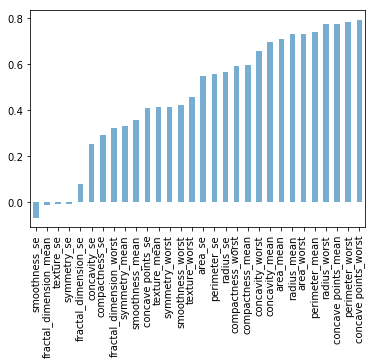

In [12]:
# Observe correlation to the diagnosis
tst = df.corr()['diagnosis'].copy()
tst = tst.drop('diagnosis')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)

In [14]:
# Separate out malignant and benign data for graphing
malignant = df[df['diagnosis'] ==1]
benign = df[df['diagnosis'] ==0]

In [15]:
# Column names to observe in following graphs - mean values only
observe = list(df.columns[1:11]) + ['area_worst'] + ['perimeter_worst']
observables = df.loc[:,observe]

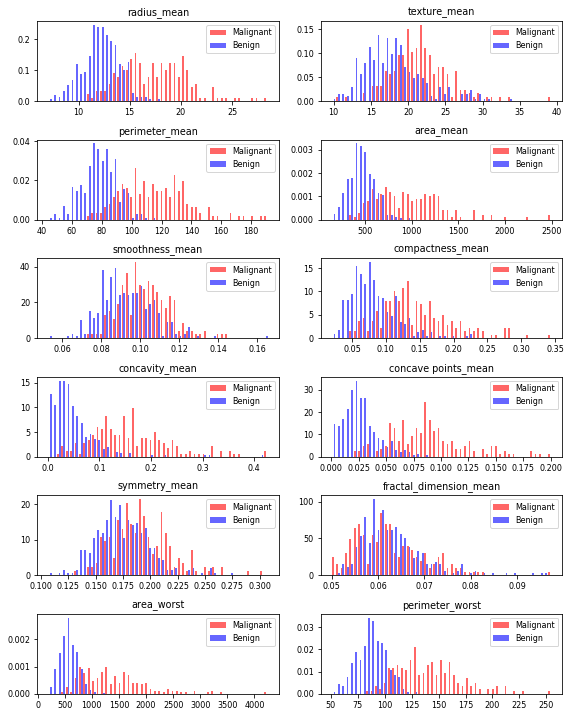

In [16]:
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows=6, ncols=2, figsize=(8,10))
graphs = graphs.flatten()
for idx, graph in enumerate(graphs):
    graph.figure
    
    binwidth= (max(df[observe[idx]]) - min(df[observe[idx]]))/50
    bins = np.arange(min(df[observe[idx]]), max(df[observe[idx]]) + binwidth, binwidth)
    graph.hist([malignant[observe[idx]],benign[observe[idx]]], bins=bins, alpha=0.6, normed=True, label=['Malignant','Benign'], color=['red','blue'])
    graph.legend(loc='upper right')
    graph.set_title(observe[idx])
plt.tight_layout()

### Observations

From the graphs, we can see that radius_mean, perimeter_mean, area_mean, concavity_mean and concave_points_mean are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.

/home/snu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


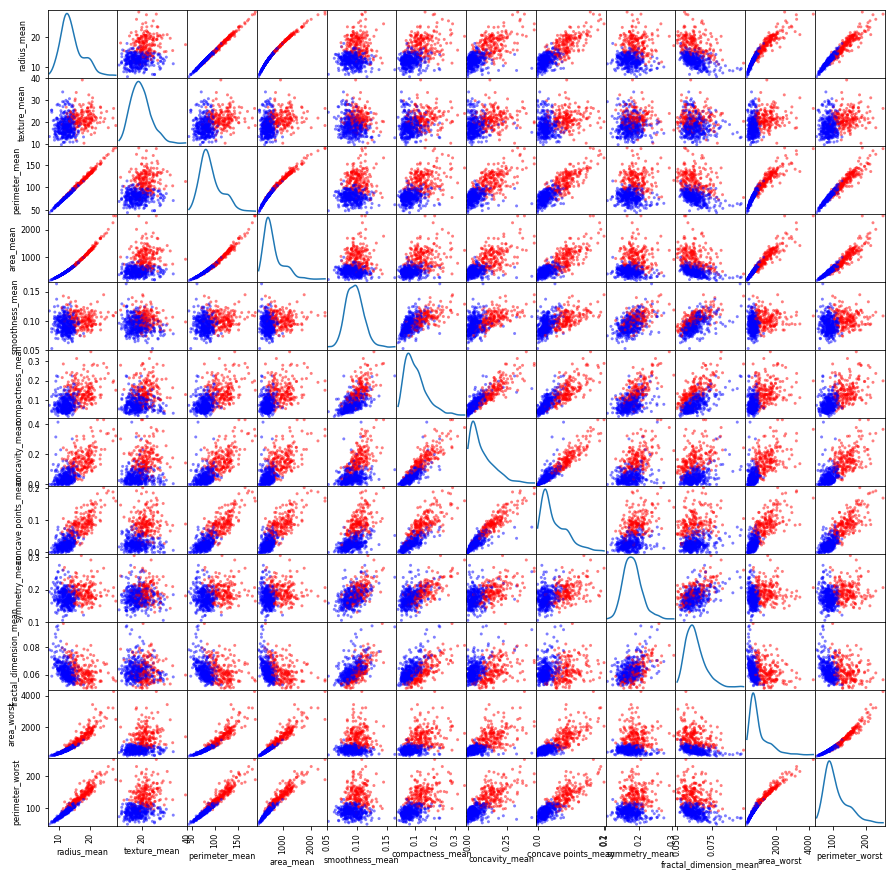

In [17]:
color_wheel = {0: "blue", 1: "red"}
colors = df["diagnosis"].map(lambda x: color_wheel.get(x))
pd.scatter_matrix(observables, c=colors, alpha = 0.5, figsize = (15, 15), diagonal = 'kde');

### Observations

The scatter matrix clarifies a few more points. The perimeter_mean, area_mean and radius mean have a strong, positive, linear correlation. Most other data also has a more rough linear correlation to other features with the exception of fractal_dimension_mean, symmetry_mean and smoothness_mean.

Within these three features we can see quite a bit of mixing between malignant and benign cancer in the scatter matrix. This suggests that our assumption above, that they do not aid in predicting cancer type, is likely correct. There is less correlation and separability between the two diagnoses.

Due to the lack of clear separability and lack of variance explained I feel comfortable dropping them.

#### Trimming Data

From observing the graphs and PCA data above: fractal_dimension_mean, smoothness_mean and symmetry_mean are not very useful in predicting the type of cancer. To aid in the learning process and remove noise, these columns will be dropped.

In [18]:
# Drop columns that do not aid in predicting type of cancer
observables.drop(['fractal_dimension_mean', 'smoothness_mean', 'symmetry_mean'],axis=1,inplace=True)

## 2. Classification

Here a comparison will be made between the different types of learning algorithms. At the end a breakdown of the data and explanation of the algorithm's performance will be made.

In [30]:
# now split our data into train and test
train, test = train_test_split(observables, test_size = 0.3) # in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(398, 9)
(171, 9)


In [33]:
# Split data appropriately
X = observables
y = df['diagnosis']

In [55]:
train_X = train[prediction_var]  # taking the training data input 
train_y = train.diagnosis  # This is output of our training data
# same we have to do for test
test_X = test[prediction_var]  # taking test data inputs
test_y = test.diagnosis  # output value of test dat

### 2.1 Random Forest Classification

In [23]:
model = RandomForestClassifier(random_state=42)

param_grid = {"max_depth": [3, None],
              "max_features":  sp_randint(1, 8),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

model = RandomizedSearchCV(rf_clf, param_distributions=param_grid, n_iter=100, random_state=42)
model.fit(X,y)

print(model.best_score_)
print(model.best_params_)
print(model.best_estimator_)

In [26]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

# the accuracy for RandomForest increase it means the value are more catogrical in Worst part
# lets get the important features
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'

---

reference : https://www.kaggle.com/gargmanish/basic-machine-learning-with-cancer/notebook

## Import Data

In [40]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
data = pd.read_csv("data/data.csv",header=0)    # here header 0 means the 0 th row is our coloumn 
                                                # header in data

In [43]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [29]:
data.shape

(569, 32)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(1), obj

In [44]:
# now we can drop this column Unnamed: 32
data.drop("Unnamed: 32",axis=1,inplace=True) # in this process this will change in our data itself 
# if you want to save your old data then you can use below code
# data1=data.drop("Unnamed:32",axis=1)
# here axis 1 means we are droping the column

In [35]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [45]:
# like this we also don't want the Id column for our analysis
data.drop("id",axis=1,inplace=True)

In [46]:
# As I said above the data can be divided into three parts.lets divied the features according to their category
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [47]:
# lets now start with features_mean 
# now as ou know our diagnosis column is a object type so we can map it to integer value
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [48]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


## Explore Data Analysis

In [39]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


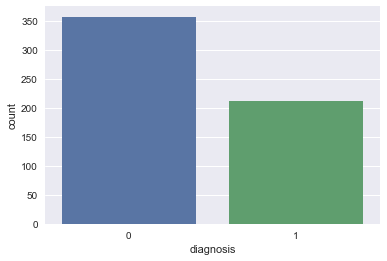

In [49]:
# lets get the frequency of cancer stages
sns.countplot(data['diagnosis'],label="Count")

In [50]:
# from this graph we can see that there is a more number of bengin stage of cancer which can be cure

## Feature Selection

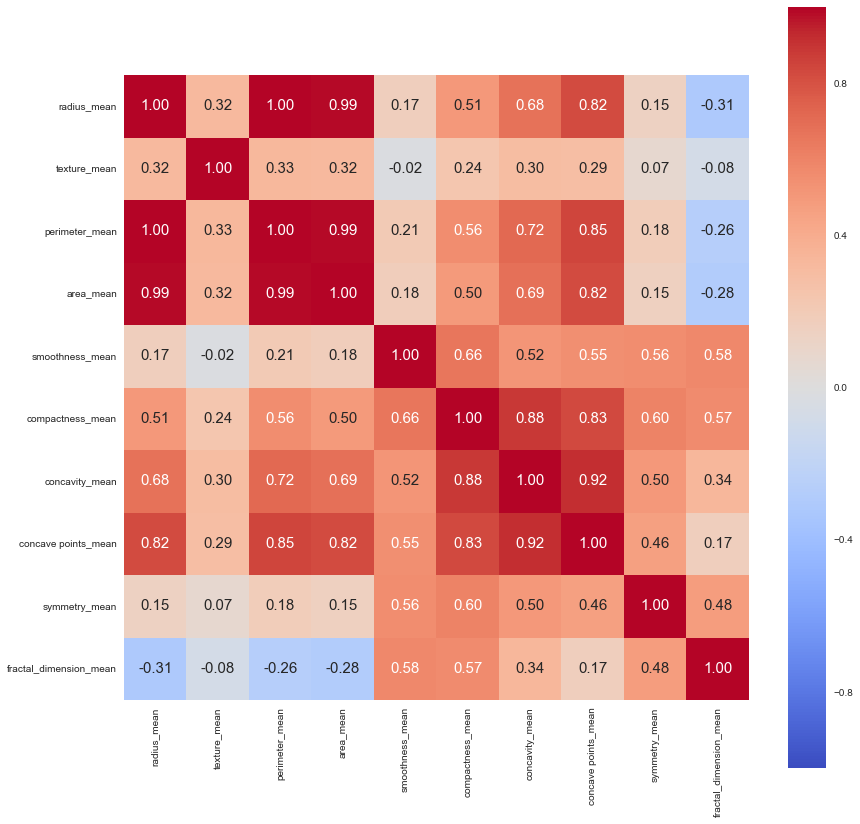

In [51]:
# now lets draw a correlation graph so that we can remove multi colinearity it means the columns are
# dependenig on each other so we should avoid it because what is the use of using same column twice
# lets check the correlation between features
# now we will do this analysis only for features_mean then we will do for others and will see who is doing best
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') # for more on heatmap you can visit Link(http://seaborn.pydata.org/generated/seaborn.heatmap.html)

### observation

+ the radius, perimeter and area are highly correlated as expected from their relation so from these we will use anyone of them
+ compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
+ so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean*

In [52]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
# now these are the variables which will use for prediction

In [53]:
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [55]:
train_X = train[prediction_var]  # taking the training data input 
train_y = train.diagnosis  # This is output of our training data
# same we have to do for test
test_X = test[prediction_var]  # taking test data inputs
test_y = test.diagnosis  # output value of test dat

## Models 1) Random Forest

In [57]:
model = RandomForestClassifier(n_estimators=100)  # a simple random forest model

In [58]:
model.fit(train_X,train_y)  # now fit our model for traiing data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [59]:
prediction = model.predict(test_X) # predict for the test data
# prediction will contain the predicted value by our model predicted values of dignosis column for test inputs

In [60]:
metrics.accuracy_score(prediction,test_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.91228070175438591

+ Here the Accuracy for our model is 91 % which seems good*

## Models 2) SVM

In [61]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.86549707602339176

+ SVM is giving only 0.85 which we can improve by using different techniques i will improve it till then beginners can understand how to model a data and they can have a overview of ML

## Feature : all feature_mean

In [62]:
prediction_var = features_mean # taking all features

In [63]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

## Models 1) Random Forest

In [64]:
model = RandomForestClassifier(n_estimators=100)

In [65]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.94152046783625731

+ by taking all features accuracy increased but not so much so according to Razor's rule simpler method is better
+ by the way now lets check the importan features in the prediction

In [66]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

concave points_mean       0.252795
perimeter_mean            0.168197
area_mean                 0.151106
radius_mean               0.143767
concavity_mean            0.111013
texture_mean              0.060149
compactness_mean          0.052791
smoothness_mean           0.028935
fractal_dimension_mean    0.016972
symmetry_mean             0.014275
dtype: float64


## Models 2) SVM

In [67]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.67836257309941517

In [68]:
# as you can see the accuracy of SVM decrease very much
# now lets take only top 5 important features given by RandomForest classifier

In [69]:
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']  

In [70]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [75]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.91812865497076024

In [76]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.70760233918128657

In [77]:
# so from this discussion we got multi colinearty effecting our SVM part a lot 
# but its not affecting so much randomforest because for random forest we dont need to make so much effort for our analysis part
# now lets do with the 3rd part of data which is worst
# first start with all features_worst

## feature : all features_worst

In [78]:
# so from this discussion we got multi colinearty effecting our SVM part a lot 
# but its not affecting so much randomforest because for random forest we dont need to make so much effort for our analysis part
# now lets do with the 3rd part of data which is worst
# first start with all features_worst

In [85]:
prediction_var = features_worst

In [86]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [87]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.63157894736842102

In [88]:
# but same problem With SVM, very much less accuray I think we have to tune its parameter
# that i will do later in intermidate part
# now we can get the important features from random forest now run Random Forest for it 

In [92]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.92982456140350878

In [93]:
# the accuracy for RandomForest increase it means the value are more catogrical in Worst part
# lets get the important features
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

perimeter_worst            0.258137
area_worst                 0.243563
concave points_worst       0.170711
radius_worst               0.117246
concavity_worst            0.069634
compactness_worst          0.055882
smoothness_worst           0.031305
texture_worst              0.019110
symmetry_worst             0.018564
fractal_dimension_worst    0.015847
dtype: float64


In [91]:
# same parameter but with great importance and here it seamed the only conacve points_worst is making 
# very important so it may be bias lets check only for top 5 important features

In [94]:
prediction_var = ['concave points_worst','radius_worst','area_worst','perimeter_worst','concavity_worst'] 

In [95]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [102]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.91812865497076024

In [103]:
#check for SVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.61988304093567248

In [104]:
# now I think for simplicity the Randomforest will be better for prediction

In [105]:
# Now explore a little bit more
# now from features_mean i will try to find the variable which can be use for classify
# so lets plot a scatter plot for identify those variable who have a separable boundary between two class
#of cancer

In [106]:
# Lets start with the data analysis for features_mean
# Just try to understand which features can be used for prediction
# I will plot scatter plot for the all features_mean for both of diagnosis Category
# and from it we will find which are easily can used for differenciate between two category

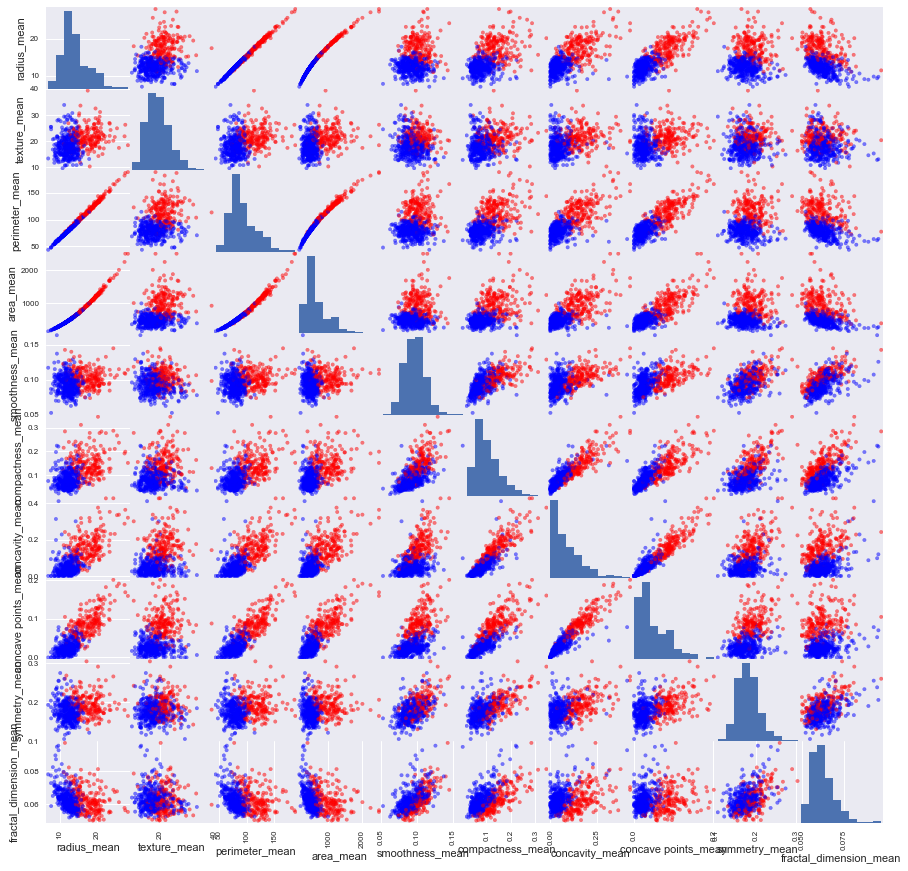

In [107]:
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

### Observation

1. Radius, area and perimeter have a strong linear relationship as expected 
2. As graph shows the features like as texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean can t be used for classify two category because both category are mixed there is no separable plane
3. So we can remove them from our prediction_var

In [108]:
# So predicton features will be 
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [109]:
# So predicton features will be 
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [111]:
# Now with these variable we will try to explore a liitle bit we will move to how to use cross validiation
# for a detail on cross validation use this link 
# https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/

In [112]:
def model(model,data,prediction,outcome):
    # This function will be used for to check accuracy of different model
    # model is the m
    kf = KFold(data.shape[0], n_folds=10) # if you have refer the link then you must understand what is n_folds

In [113]:
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [114]:
# so those features who are capable of classify classe will be more useful

In [115]:
# so in this part i am going to explain about only some concept of machine learnig 
# here I will also compare the accuracy of different models
# I will First use cross validation with different model
# then I will explain about how to to tune the parameter of models using gridSearchCV 

In [116]:
# As we are going to use many models lets make a function
# Which we can use with different models
def classification_model(model,data,prediction_input,output):
    # here the model means the model 
    # data is used for the data 
    # prediction_input means the inputs used for prediction
    # output mean the value which are to be predicted
    # here we will try to find out the Accuarcy of model by using same data for fiiting and 
    # comparison for same data
    # Fit the model:
    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
  
    # Make predictions on training set:
    predictions = model.predict(data[prediction_input])
  
    # Print accuracy
    # now checking accuracy for same data
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
 
    
    kf = KFold(data.shape[0], n_folds=5)
    # About cross validitaion please follow this link
    # https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/
    # let me explain a little bit data.shape[0] means number of rows in data
    # n_folds is for number of folds
    error = []
    for train, test in kf:
        # as the data is divided into train and test using KFold
        # now as explained above we have fit many models 
        # so here also we are going to fit model
        # in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# in this iloc is used for index of trainig data
        # here iloc[train,:] means all row in train in kf amd the all columns
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train
        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

In [117]:
# Now from Here start using different model

## Decision Tree

In [118]:
model = DecisionTreeClassifier()
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var= "diagnosis"
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 85.965%
Cross-Validation Score : 87.281%
Cross-Validation Score : 88.889%
Cross-Validation Score : 90.132%
Cross-Validation Score : 90.512%


#### observation

+ Accuracy is 100 % means over fitting
+ but cross validation scores are not good 3 so accuracy cant be considered only factor here

## SVM

In [119]:
# now move to svm

In [120]:
model = svm.SVC()

classification_model(model,data,prediction_var,outcome_var)

Accuracy : 96.661%
Cross-Validation Score : 56.140%
Cross-Validation Score : 65.789%
Cross-Validation Score : 69.883%
Cross-Validation Score : 72.807%
Cross-Validation Score : 74.706%


In [121]:
# I am facing problem with SVM dont know why?
# lets leave that we will try to do it later 

## KNN

In [122]:
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 90.510%
Cross-Validation Score : 76.316%
Cross-Validation Score : 80.263%
Cross-Validation Score : 85.965%
Cross-Validation Score : 86.623%
Cross-Validation Score : 86.820%


## Random Forest

In [123]:
# same here cross validation scores are not good
# now move to RandomForestclassifier
model = RandomForestClassifier(n_estimators=100)
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 84.211%
Cross-Validation Score : 87.719%
Cross-Validation Score : 90.351%
Cross-Validation Score : 91.228%
Cross-Validation Score : 91.213%


## Logistic Regression

In [125]:
# cross validation score are also not bed
# so Random forest is good
# lets try with logistic regression
model = LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 89.279%
Cross-Validation Score : 78.070%
Cross-Validation Score : 82.018%
Cross-Validation Score : 86.550%
Cross-Validation Score : 87.939%
Cross-Validation Score : 89.112%
